In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size = 32
num_classes = 10
epochs = 20
num_predictions = 20

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 59s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


[6]


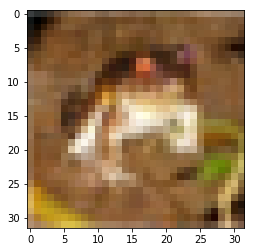

In [6]:
print(y_train[0])
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [31]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
# model build
model = Sequential()

model.add(Conv2D(32, (3,3),
                padding = 'same',
                activation = 'relu',
                input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

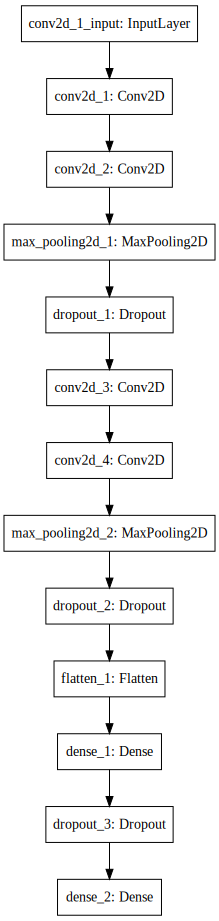

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [34]:
print(model.layers[0].input_shape) # conv2d
# First module's output shape
print(model.layers[0].output_shape) # conv2d
print(model.layers[1].output_shape) # conv2d
print(model.layers[2].output_shape) # maxpool2d

(None, 32, 32, 3)
(None, 32, 32, 32)
(None, 30, 30, 32)
(None, 15, 15, 32)


In [24]:
# Second module's output shape
print(model.layers[4].output_shape) # conv2d
print(model.layers[5].output_shape) # conv2d
print(model.layers[6].output_shape) # maxpool2d

(None, 15, 15, 64)
(None, 13, 13, 64)
(None, 6, 6, 64)


In [25]:
# Thrisd module's output shape
print(model.layers[8].output_shape) # conv2d
print(model.layers[9].output_shape) # conv2d
print(model.layers[11].output_shape) # maxpool2d

(None, 2304)
(None, 512)
(None, 10)


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [30]:
optimizer = keras.optimizers.adam(lr=0.0001)
model.compile(loss=keras.losses.categorical_crossentropy
             , optimizer=optimizer
             , metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train
         , batch_size=batch_size
         , epochs = epochs
         , validation_data=(x_test, y_test)
         , shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 1248/50000 [..............................] - ETA: 3:15 - loss: 1.6019 - acc: 0.4191

KeyboardInterrupt: 

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))